## Ejercicio 4

Julián Cámara Miró

In [4]:
import matplotlib.pyplot as plt

def plot_histogram(result: dict, width=5) -> None:
    
    counts = sorted(result.items(), key=lambda x: x[0])
    keys = [str(x[0]) for x in counts]
    
    values = [x[1] for x in counts]
    plt.figure(figsize=(width, 5))
    plt.bar_label(plt.bar(keys, [x / 1000 for x in values]), values)

### 2 qubits - constante

In [2]:
from braket.circuits import Circuit

def hadamards(circuit: Circuit, n: int):
    
    for i in range(n):
        circuit.h(i)

In [23]:
c2c = Circuit()

c2c.x(2)
hadamards(c2c, 3)

c2c.cnot(1, 2)
c2c.x(1)
c2c.cnot(1, 2)

hadamards(c2c, 3)

print(c2c)


T  : |0|1|2|3|4|5|
                  
q0 : -H-H---------
                  
q1 : -H---C-X-C-H-
          |   |   
q2 : -X-H-X---X-H-

T  : |0|1|2|3|4|5|


Ejecutamos el circuito en los backends.

Como a la hora de medir solo nos interesan los dos primeros qubits, quitamos de la medición el que no nos intersa.


#### Rigetti:

In [24]:
from braket.aws import AwsDevice

# Necesitamos configurar la región a us-west-1
device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/JulianCamara/Rigetti")

task = device.run(c2c, s3_folder)
print("Task:",task.id)
print("Status:", task.state())

Task: arn:aws:braket:us-west-1:975085098040:quantum-task/07833996-58d2-4c3f-b1a0-0e851d3c52c8
Status: CREATED


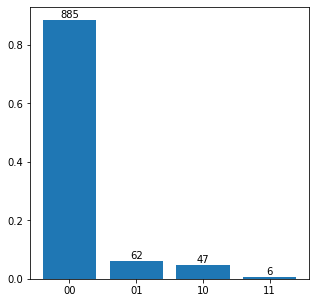

In [26]:
from collections import Counter
from braket.aws import AwsQuantumTask

task = AwsQuantumTask(arn="arn:aws:braket:us-west-1:975085098040:quantum-task/07833996-58d2-4c3f-b1a0-0e851d3c52c8")

if task.state() == "COMPLETED":
    results = Counter([''.join(str(i) for i in x[:2]) for x in task.result().measurements])
    plot_histogram(results)

else:
    print(task.state())

#### IonQ:

In [27]:
from braket.aws import AwsDevice

# Necesitamos configurar la región a us-west-1
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/JulianCamara/IonQ")

task = device.run(c2c, s3_folder)
print("Task:",task.id)
print("Status:", task.state())

Task: arn:aws:braket:us-east-1:975085098040:quantum-task/5ee10b8d-5775-4ef6-b94e-b98474571444
Status: CREATED


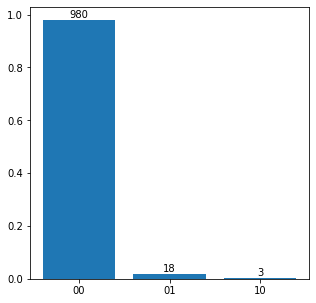

In [31]:
from collections import Counter
from braket.aws import AwsQuantumTask

task = AwsQuantumTask(arn="arn:aws:braket:us-east-1:975085098040:quantum-task/5ee10b8d-5775-4ef6-b94e-b98474571444")

if task.state() == "COMPLETED":
    results = Counter([''.join(str(i) for i in x[:2]) for x in task.result().measurements])
    plot_histogram(results)

else:
    print(task.state())

Vemos que en ambos casos se disntingue claramente que el resultado válido (sin interferencias de ruido), es el *00*. Al tratarse de un circuito bastante simple, la profunidad es bastante baja, por lo que el ruido apenas produce mediciones incorrectas.

### 2 qubits - Balanceada 1

In [34]:
c2b1 = Circuit()

c2b1.x(2)
hadamards(c2b1, 3)

c2b1.cnot(0, 2)
c2b1.cnot(1, 2)

hadamards(c2b1, 3)

print(c2b1)

T  : |0|1|2|3|4|
                
q0 : -H---C-H---
          |     
q1 : -H---|-C-H-
          | |   
q2 : -X-H-X-X-H-

T  : |0|1|2|3|4|


#### Rigetti

In [50]:
from braket.aws import AwsDevice

# Necesitamos configurar la región a us-west-1
device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/JulianCamara/Rigetti")

task = device.run(c2b1, s3_folder)
print("Task:",task.id)
print("Status:", task.state())

Task: arn:aws:braket:us-west-1:975085098040:quantum-task/6e9ddf69-6ef4-4d3f-8bc1-ac1dc1101c9b
Status: CREATED


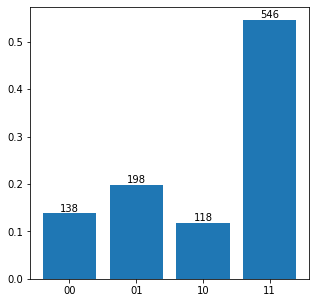

In [52]:
from collections import Counter
from braket.aws import AwsQuantumTask

task = AwsQuantumTask(arn="arn:aws:braket:us-west-1:975085098040:quantum-task/6e9ddf69-6ef4-4d3f-8bc1-ac1dc1101c9b")

if task.state() == "COMPLETED":
    results = Counter([''.join(str(i) for i in x[:2]) for x in task.result().measurements])
    plot_histogram(results)

else:
    print(task.state())

Aunque hemos medido *(11)* la mayoría de las veces, el número de mediciones correctas es tan solo un 50% aproximadamente.

#### IonQ

In [37]:
from braket.aws import AwsDevice

# Necesitamos configurar la región a us-west-1
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/JulianCamara/IonQ")

task = device.run(c2b1, s3_folder)
print("Task:",task.id)
print("Status:", task.state())

Task: arn:aws:braket:us-east-1:975085098040:quantum-task/f64fe6aa-aee8-4b52-af69-fea8641d92e8
Status: CREATED


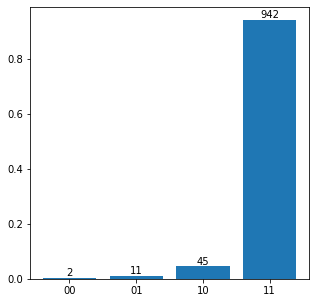

In [46]:
from collections import Counter
from braket.aws import AwsQuantumTask

task = AwsQuantumTask(arn="arn:aws:braket:us-east-1:975085098040:quantum-task/f64fe6aa-aee8-4b52-af69-fea8641d92e8")

if task.state() == "COMPLETED":
    results = Counter([''.join(str(i) for i in x[:2]) for x in task.result().measurements])
    plot_histogram(results)

else:
    print(task.state())

En este caso vemos de nuevo que los computadores de IonQ proporcionan el mejor resultado. Vemos que solo hemos medidio *(00)* 2 veces en 1000 shots.

### 2 qubits - Balanceada 2

In [53]:
c2b2 = Circuit()

c2b2.x(2)
hadamards(c2b2, 3)

c2b2.x(0)
c2b2.cnot(0, 2)

hadamards(c2b2, 3)

print(c2b2)

T  : |0|1|2|3|
              
q0 : -H-X-C-H-
          |   
q1 : -H-H-|---
          |   
q2 : -X-H-X-H-

T  : |0|1|2|3|


#### Rigetti

In [44]:
from braket.aws import AwsDevice

# Necesitamos configurar la región a us-west-1
device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/JulianCamara/Rigetti")

task = device.run(c2b2, s3_folder)
print("Task:",task.id)
print("Status:", task.state())

Task: arn:aws:braket:us-west-1:975085098040:quantum-task/adf92a28-737a-4286-9e57-d8ac226630eb
Status: CREATED


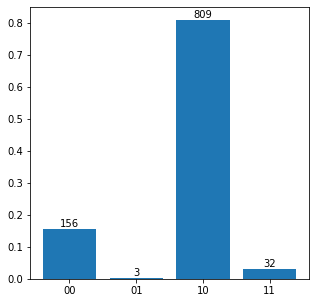

In [45]:
from collections import Counter
from braket.aws import AwsQuantumTask

task = AwsQuantumTask(arn="arn:aws:braket:us-west-1:975085098040:quantum-task/adf92a28-737a-4286-9e57-d8ac226630eb")

if task.state() == "COMPLETED":
    results = Counter([''.join(str(i) for i in x[:2]) for x in task.result().measurements])
    plot_histogram(results)

else:
    print(task.state())

#### IonQ

In [54]:
from braket.aws import AwsDevice

# Necesitamos configurar la región a us-west-1
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/JulianCamara/IonQ")

task = device.run(c2b2, s3_folder)
print("Task:",task.id)
print("Status:", task.state())

Task: arn:aws:braket:us-east-1:975085098040:quantum-task/6bed5e04-bdcb-4cba-800e-9aec520999db
Status: CREATED


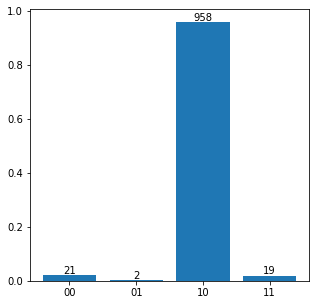

In [56]:
from collections import Counter
from braket.aws import AwsQuantumTask

task = AwsQuantumTask(arn="arn:aws:braket:us-east-1:975085098040:quantum-task/6bed5e04-bdcb-4cba-800e-9aec520999db")

if task.state() == "COMPLETED":
    results = Counter([''.join(str(i) for i in x[:2]) for x in task.result().measurements])
    plot_histogram(results)

else:
    print(task.state())

Esta vez los resultados son bastante buenos en ambos backends.

### 3 qubits - Constante

In [14]:
c3c = Circuit()

c3c.x(3)
hadamards(c3c, 4)


c3c.cnot(0, 3)
c3c.x(0)
c3c.cnot(0, 3)

c3c.cnot(2, 3)
c3c.x(2)
c3c.cnot(2, 3)

hadamards(c3c, 4)

print(c3c)

T  : |0|1|2|3|4|5|6|7|8|
                        
q0 : -H---C-X-C-H-------
          |   |         
q1 : -H-H-|---|---------
          |   |         
q2 : -H---|---|-C-X-C-H-
          |   | |   |   
q3 : -X-H-X---X-X---X-H-

T  : |0|1|2|3|4|5|6|7|8|


#### Rigetti:

In [15]:
from braket.aws import AwsDevice

# Necesitamos configurar la región a us-west-1
device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/JulianCamara/Rigetti")

task = device.run(c3c, s3_folder)
print("Task:",task.id)
print("Status:", task.state())

Task: arn:aws:braket:us-west-1:975085098040:quantum-task/e3ccd26d-0f8b-4a18-938d-6830930b3330
Status: CREATED


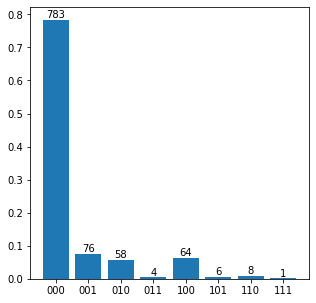

In [17]:
from collections import Counter
from braket.aws import AwsQuantumTask

task = AwsQuantumTask(arn="arn:aws:braket:us-west-1:975085098040:quantum-task/e3ccd26d-0f8b-4a18-938d-6830930b3330")

if task.state() == "COMPLETED":
    results = Counter([''.join(str(i) for i in x[:3]) for x in task.result().measurements])
    plot_histogram(results)

else:
    print(task.state())

#### IonQ

In [18]:
from braket.aws import AwsDevice

# Necesitamos configurar la región a us-west-1
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/JulianCamara/IonQ")

task = device.run(c3c, s3_folder)
print("Task:",task.id)
print("Status:", task.state())

Task: arn:aws:braket:us-east-1:975085098040:quantum-task/eaf43cf5-229f-41c4-a9b6-18e93ca70366
Status: CREATED


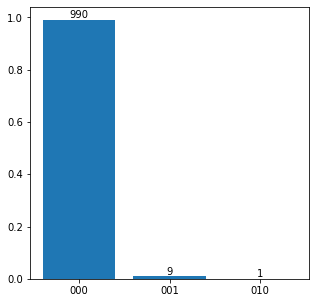

In [55]:
from collections import Counter
from braket.aws import AwsQuantumTask

task = AwsQuantumTask(arn="arn:aws:braket:us-east-1:975085098040:quantum-task/eaf43cf5-229f-41c4-a9b6-18e93ca70366")

if task.state() == "COMPLETED":
    results = Counter([''.join(str(i) for i in x[:3]) for x in task.result().measurements])
    plot_histogram(results)

else:
    print(task.state())

Vemos que en ambos casos se ve claramente que la función es constante, puesto que *(000)* es el único que se mide significativamente.

### 3 qubits - Balanceada 1

In [30]:
c3b1 = Circuit()

c3b1.x(3)
hadamards(c3b1, 4)

c3b1.cnot(0, 3)
c3b1.cnot(2, 3)

hadamards(c3b1, 4)

print(c3b1)

T  : |0|1|2|3|4|
                
q0 : -H---C-H---
          |     
q1 : -H-H-|-----
          |     
q2 : -H---|-C-H-
          | |   
q3 : -X-H-X-X-H-

T  : |0|1|2|3|4|


#### Rigetti

In [31]:
from braket.aws import AwsDevice

# Necesitamos configurar la región a us-west-1
device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/JulianCamara/Rigetti")

task = device.run(c3b1, s3_folder)
print("Task:",task.id)
print("Status:", task.state())

Task: arn:aws:braket:us-west-1:975085098040:quantum-task/bf3550f6-33e2-4648-9110-bb9559b7831f
Status: CREATED


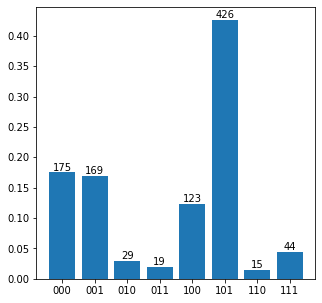

In [33]:
from collections import Counter
from braket.aws import AwsQuantumTask

task = AwsQuantumTask(arn="arn:aws:braket:us-west-1:975085098040:quantum-task/bf3550f6-33e2-4648-9110-bb9559b7831f")

if task.state() == "COMPLETED":
    results = Counter([''.join(str(i) for i in x[:3]) for x in task.result().measurements])
    plot_histogram(results)

else:
    print(task.state())

#### IonQ

In [34]:
from braket.aws import AwsDevice

# Necesitamos configurar la región a us-west-1
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/JulianCamara/IonQ")

task = device.run(c3b1, s3_folder)
print("Task:",task.id)
print("Status:", task.state())

Task: arn:aws:braket:us-east-1:975085098040:quantum-task/5df76ca7-3fc6-44c1-8c37-69780ecf115f
Status: CREATED


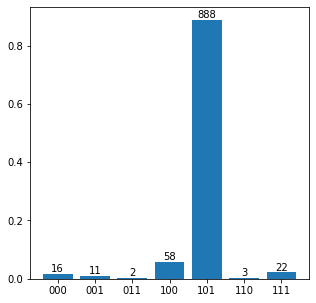

In [37]:
from collections import Counter
from braket.aws import AwsQuantumTask

task = AwsQuantumTask(arn="arn:aws:braket:us-east-1:975085098040:quantum-task/5df76ca7-3fc6-44c1-8c37-69780ecf115f")

if task.state() == "COMPLETED":
    results = Counter([''.join(str(i) for i in x[:3]) for x in task.result().measurements])
    plot_histogram(results)

else:
    print(task.state())

En este caso, los resultados en Rigetti son algo confusos, pero en IonQ se ve claramente que la función es balanceada.

#### 3 qubits - Balanceada 2

In [46]:
c3b2 = Circuit()

c3b2.x(3)
hadamards(c3b2, 4)

c3b2.x(0)
c3b2.cnot(0, 3)

hadamards(c3b2, 4)

print(c3b2)

T  : |0|1|2|3|
              
q0 : -H-X-C-H-
          |   
q1 : -H-H-|---
          |   
q2 : -H-H-|---
          |   
q3 : -X-H-X-H-

T  : |0|1|2|3|


#### Rigetti

In [47]:
from braket.aws import AwsDevice

# Necesitamos configurar la región a us-west-1
device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/JulianCamara/Rigetti")

task = device.run(c3b2, s3_folder)
print("Task:",task.id)
print("Status:", task.state())

Task: arn:aws:braket:us-west-1:975085098040:quantum-task/42e218c8-deac-4059-87e4-c7149d675ea1
Status: CREATED


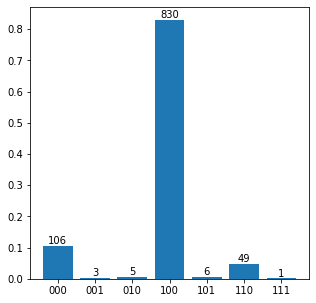

In [60]:
from collections import Counter
from braket.aws import AwsQuantumTask

task = AwsQuantumTask(arn="arn:aws:braket:us-west-1:975085098040:quantum-task/42e218c8-deac-4059-87e4-c7149d675ea1")

if task.state() == "COMPLETED":
    results = Counter([''.join(str(i) for i in x[:3]) for x in task.result().measurements])
    plot_histogram(results)

else:
    print(task.state())

#### IonQ

In [50]:
from braket.aws import AwsDevice

# Necesitamos configurar la región a us-west-1
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/JulianCamara/IonQ")

task = device.run(c3b2, s3_folder)
print("Task:",task.id)
print("Status:", task.state())

Task: arn:aws:braket:us-east-1:975085098040:quantum-task/5672aacc-718c-4f74-8c93-68de03d8ec10
Status: CREATED


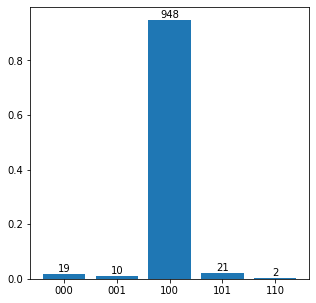

In [53]:
from collections import Counter
from braket.aws import AwsQuantumTask

task = AwsQuantumTask(arn="arn:aws:braket:us-east-1:975085098040:quantum-task/5672aacc-718c-4f74-8c93-68de03d8ec10")

if task.state() == "COMPLETED":
    results = Counter([''.join(str(i) for i in x[:3]) for x in task.result().measurements])
    plot_histogram(results)

else:
    print(task.state())

En ambos backend obtenemos un resultado satisfactorio. 